In [1]:
import pandas as pd
import numpy as np
import altair as alt

import seaborn as sns

In [56]:
df_train = pd.read_csv('train.csv')

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Find Null values
print('Total Records: ' + str(len(df_train)))

df_train.isnull().sum()

Total Records: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Pre-processing:
    
    (1) Only bring in needed columns
    (2) Impute Embarked location (with a 'U' for 'Unknown')
    (3) Create dummy variables for our remaining categorical columns (Embarked and Sex)
    (4) Use a linear regression to impute missing values for age

In [60]:
# (1) Only bring in needed columns
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

df_train = df_train[columns]

In [61]:
# (2) Impute embarked Location

df_train['Embarked'].fillna('U', inplace = True)

In [64]:
# (3) Create dummy variables
df_train = pd.get_dummies(df_train)

In [66]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [68]:
imp.fit?

Signature: imp.fit(X, y=None)
Docstring:
Fits the imputer on X and return self.

Parameters
----------
X : array-like, shape (n_samples, n_features)
    Input data, where "n_samples" is the number of samples and
    "n_features" is the number of features.

y : ignored

Returns
-------
self : object
    Returns self.
File:      /opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py
Type:      method


#### 177 of the 891 records in the Age column are NULL, let's try to impute with Linear Regression:

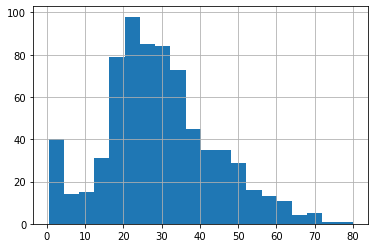

In [11]:
df_train['Age'].hist(bins = 20);

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
imp = IterativeImputer(max_iter=10, random_state=0)

IterativeImputer(random_state=0)

In [15]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_train_age_T = df_train